In [ ]:
import pandas as pd
import plotly.graph_objects as go

file_path = 'wine_review.csv'
wine_data = pd.read_csv(file_path)

variety_analysis = wine_data.groupby(['variety', 'points']).agg(
    count=('points', 'size'),
    superior_count=('superior_rating', 'sum')
).reset_index()

varieties = variety_analysis['variety'].unique().tolist()
points = sorted(variety_analysis['points'].unique().tolist())
labels = varieties + points + ["Not Superior", "Superior"]

variety_idx = {variety: i for i, variety in enumerate(varieties)}
points_idx = {point: len(varieties) + i for i, point in enumerate(points)}
not_superior_idx = len(varieties) + len(points)
superior_idx = not_superior_idx + 1

source_variety_to_points = variety_analysis.apply(lambda x: variety_idx[x['variety']], axis=1)
target_variety_to_points = variety_analysis.apply(lambda x: points_idx[x['points']], axis=1)
values_variety_to_points = variety_analysis['count']

source_points_to_rating = target_variety_to_points
target_points_to_rating = variety_analysis.apply(lambda x: superior_idx if x['superior_count'] > 0 else not_superior_idx, axis=1)
values_points_to_rating = variety_analysis['count']

sources = source_variety_to_points.tolist() + source_points_to_rating.tolist()
targets = target_variety_to_points.tolist() + target_points_to_rating.tolist()
values = values_variety_to_points.tolist() + values_points_to_rating.tolist()

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=["lightskyblue" if i < len(values_variety_to_points) else "yellow" for i in range(len(values))]
    )
)])

fig.update_layout(
    title_text="From Grape to Greatness: Tracing Wine Varieties and Their Superiority ",
    font_family="Arial",
    font_size=12,
    title_font_size=24,
    title_x=0.5,
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=1200,  # Increased width
    height=800,  # Increased height
    annotations=[
        dict(
            x=0.5,
            y=-0.1,
            xref="paper",
            yref="paper",
            text="Data Source: Wine Dataset",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.show()


In [ ]:
import pandas as pd

dataset = pd.read_csv("wine_review.csv")

dataset.head(), dataset.columns

(   points  superior_rating  price                   variety  Crisp  Dry  \
 0      91                1     43           Champagne Blend      0    1   
 1      87                0     17  Bordeaux-style Red Blend      0    0   
 2      87                0     34           Champagne Blend      0    0   
 3      90                1     35                      Rosé      1    0   
 4      87                0     45                Chardonnay      1    0   
 
    Finish  Firm  Fresh  Fruit  Full  Rich  Round  Soft  Sweet  \
 0       1     0      0      0     0     1      1     0      0   
 1       0     0      0      1     0     0      0     0      0   
 2       0     1      0      1     1     0      0     0      0   
 3       1     0      0      1     1     0      0     1      0   
 4       0     0      0      0     0     0      0     1      0   
 
                                          description  
 0  Has round, complete, aged Champagne aromas of ...  
 1  This well-balanced wine is b

## Logistic Regression (Classification)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X = dataset.drop(['superior_rating', 'description'], axis=1)
y = dataset['superior_rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['points', 'price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['variety'])
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Not Superior', 'Superior'])

report_dict = classification_report(y_test, y_pred, target_names=['Not Superior', 'Superior'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df = report_df.round(2)

report_df

,precision,recall,f1-score,support
Not Superior,1.0,1.0,1.0,387.0
Superior,1.0,1.0,1.0,238.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,625.0
weighted avg,1.0,1.0,1.0,625.0


## Regression Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

dataset = pd.read_csv("wine_review.csv")

# Preprocessing
dataset_encoded = pd.get_dummies(dataset, columns=['variety'])

# Feature selection
X = dataset_encoded.drop(columns=['points', 'superior_rating', 'description'])
y = dataset_encoded['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("Support Vector Regressor", SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)),
    ("MLP Regressor", MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r_squared = r2_score(y_test, y_pred)
    avg_error = np.mean(y_test - y_pred)
    mse = mean_squared_error(y_test, y_pred)
    med_abs_error = median_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        "Model": name,
        "R-squared": round(r_squared, 2),
        "Average Error": round(avg_error, 2),
        "Mean Squared Error": round(mse, 2),
        "Median Absolute Error": round(med_abs_error, 2),
        "Root Mean Squared Error": round(rmse, 2)
    })

results_df = pd.DataFrame(results)
print(results_df)


                         Model  R-squared  Average Error  Mean Squared Error  \
0            Linear Regression       0.17          -0.29                7.76   
1      Random Forest Regressor       0.55          -0.07                4.17   
2  Gradient Boosting Regressor       0.57          -0.11                4.05   
3     Support Vector Regressor       0.45          -0.13                5.13   
4                MLP Regressor       0.33          -0.19                6.27   

   Median Absolute Error  Root Mean Squared Error  
0                   1.52                     2.79  
1                   1.21                     2.04  
2                   1.27                     2.01  
3                   1.41                     2.26  
4                   1.45                     2.50  


## SHAP Analysis on Gradient Boosting Reg.

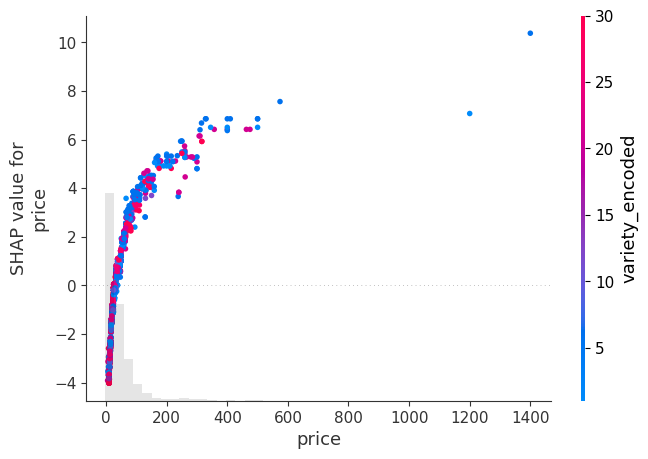

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import shap

file_path = 'wine_review.csv'  # Replace this with your actual file path
data = pd.read_csv(file_path)

data = data.dropna(subset=['price', 'points', 'variety'])

le = LabelEncoder()
data['variety_encoded'] = le.fit_transform(data['variety'])

X = data[['price', 'variety_encoded']]  # Including 'variety_encoded' as a feature
y = data['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define and train the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

shap.plots.scatter(shap_values[:,"price"], color=shap_values[:,"variety_encoded"])

plt.show()


In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.7 MB/s eta 0:00:00


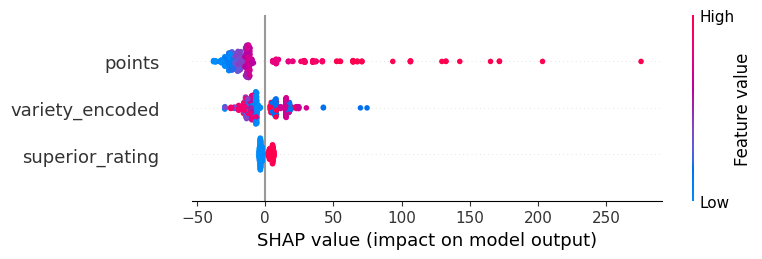

Error plotting interaction values: only integer scalar arrays can be converted to a scalar index


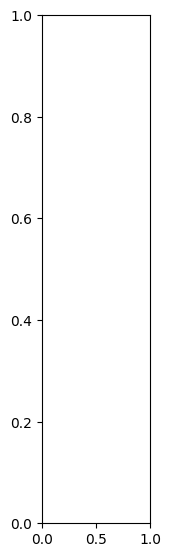

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import shap
import pandas as pd

# Load your data
file_path = 'wine_review.csv'
wine_data = pd.read_csv(file_path)

encoder = LabelEncoder()
wine_data['variety_encoded'] = encoder.fit_transform(wine_data['variety'])

features = ['points', 'superior_rating', 'variety_encoded']
X = wine_data[features]
y = wine_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Creating SHAP values using the TreeExplainer
gb_explainer = shap.Explainer(gb_model, X_train)
gb_shap_values = gb_explainer(X_test)

# Plotting the SHAP values for all features
shap.summary_plot(gb_shap_values, X_test, feature_names=features)

try:
    gb_shap_interaction_values = gb_explainer.shap_interaction_values(X_test)
    shap.summary_plot(gb_shap_interaction_values, X_test, feature_names=features, plot_type='bar')
except Exception as e:
    print("Error plotting interaction values:", e)



In [ ]:
pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
dataset['is_superior'] = (dataset['points'] >= 90).astype(int)

X = dataset.drop(columns=['points', 'description', 'superior_rating', 'price', 'is_superior'])  # Exclude price and target
y = dataset['is_superior']  # New binary target

preprocessor_without_price = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features.drop('price')),  # exclude price from numeric features
        ('cat', OneHotEncoder(), categorical_features)
    ])

model_pipeline_without_price = Pipeline(steps=[
    ('preprocessor', preprocessor_without_price),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline_without_price.fit(X_train, y_train)

model_score_without_price = model_pipeline_without_price.score(X_test, y_test)

feature_importances_without_price = model_pipeline_without_price.named_steps['regressor'].feature_importances_

encoded_features_without_price = (model_pipeline_without_price.named_steps['preprocessor']
                                  .named_transformers_['cat']
                                  .get_feature_names_out(input_features=categorical_features))
all_features_without_price = list(numeric_features.drop('price')) + list(encoded_features_without_price)

model_score_without_price, dict(zip(all_features_without_price, feature_importances_without_price))


(0.21470251478671143,
 {'Crisp': 0.03612648544929739,
  'Dry': 0.023611213454968027,
  'Finish': 0.018058551124096916,
  'Firm': 0.02531368528589056,
  'Fresh': 0.03387216360395484,
  'Fruit': 0.012466832082417832,
  'Full': 0.050385826118073004,
  'Rich': 0.30836273629037997,
  'Round': 0.00412970137163359,
  'Soft': 0.11902589138247517,
  'Sweet': 0.020500948472247503,
  'variety_Alsace white blend': 0.002828647027935193,
  'variety_Bordeaux-style Red Blend': 0.010781815029814653,
  'variety_Bordeaux-style White Blend': 0.0066345673721376125,
  'variety_Cabernet Franc': 0.004979174936480805,
  'variety_Cabernet Sauvignon': 0.006177105687470033,
  'variety_Champagne Blend': 0.04066358147088178,
  'variety_Chardonnay': 0.02161727564902722,
  'variety_Chenin Blanc': 0.0,
  'variety_Chenin Blanc-Chardonnay': 0.004996077480943568,
  'variety_Gamay': 0.033510186330891534,
  'variety_Gewürztraminer': 0.0066502278480312475,
  'variety_Grenache': 0.0006692593285163101,
  'variety_Malbec': 0.0

- Rich: The taste attribute "Rich" is by far the most influential feature, with about 30.8% contribution. This suggests that wines perceived as richer are more likely to be rated as superior.
- Soft: The "Soft" attribute also plays a significant role, contributing around 11.9%.
- Full: This attribute follows with about 5.0% importance, indicating a preference for fuller-bodied wines among higher-rated wines.
- Variety: Certain wine varieties like 'Champagne Blend' and 'Pinot Noir' also show notable influence on the rating, suggesting that these varieties have a higher likelihood of being rated as superior.

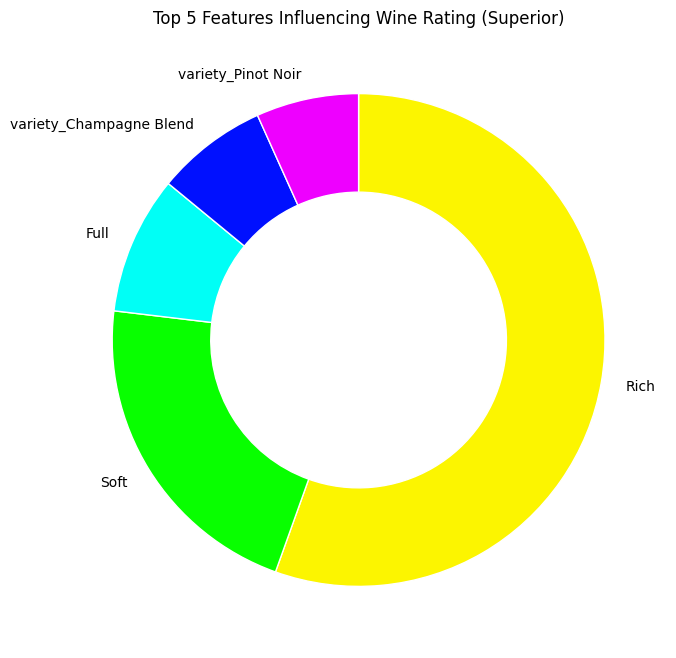

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance_data = dict(zip(all_features_without_price, feature_importances_without_price))
top_5_features = dict(sorted(feature_importance_data.items(), key=lambda item: item[1], reverse=True)[:5])


labels = list(top_5_features.keys())
sizes = list(top_5_features.values())
colors = sns.color_palette('hsv', len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops={'width':0.4, 'edgecolor':'w'})
plt.title('Top 5 Features Influencing Wine Rating (Superior)')
plt.show()


In [ ]:
average_ratings = dataset.groupby('variety')['points'].mean()
average_prices = dataset.groupby('variety')['price'].mean()

average_data = pd.concat([average_ratings, average_prices], axis=1)

average_data['value_for_money'] = average_data['points'] / average_data['price']

sorted_varieties = average_data.sort_values(by='value_for_money', ascending=False)

# top 10 varieties with the best value for money
sorted_varieties.head(10)


,points,price,value_for_money
variety,,,
Cabernet Sauvignon,83.333333,10.666667,7.812500
Merlot,84.800000,14.400000,5.888889
Melon,87.250000,15.833333,5.510526
Gamay,86.887097,16.274194,5.338949
Chenin Blanc-Chardonnay,87.250000,16.500000,5.287879
Tannat-Cabernet,89.250000,17.750000,5.028169
Sparkling Blend,86.484848,17.757576,4.870307
White Blend,87.243243,18.081081,4.825112
Malbec-Merlot,88.625000,18.625000,4.758389


from matplotlib import pyplot as plt
_df_0['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['value_for_money'].plot(kind='hist', bins=20, title='value_for_money')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='points', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='price', y='value_for_money', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['points'].plot(kind='line', figsize=(8, 4), title='points')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['value_for_money'].plot(kind='line', figsize=(8, 4), title='value_for_money')
plt.gca().spines[['top', 'right']].set_visible(False)

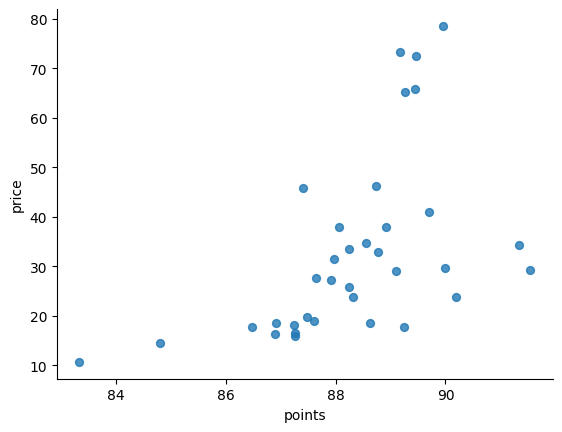

In [ ]:
# @title points vs price

from matplotlib import pyplot as plt
sorted_varieties.plot(kind='scatter', x='points', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)